In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.cluster import KMeans

# Bank Client



In [30]:
bank = pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,contact_count,previous,outcome
0,58,management,married,tertiary,2143,1,0,5,5,261,1,0,0
1,44,technician,single,secondary,29,1,0,5,5,151,1,0,0
2,33,entrepreneur,married,secondary,2,1,1,5,5,76,1,0,0
3,35,management,married,tertiary,231,1,0,5,5,139,1,0,0
4,28,management,single,tertiary,447,1,1,5,5,217,1,0,0


In [31]:
bank.info()
# no missing values
# job, marital, education are object, need to get dummies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43193 entries, 0 to 43192
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            43193 non-null  int64 
 1   job            43193 non-null  object
 2   marital        43193 non-null  object
 3   education      43193 non-null  object
 4   balance        43193 non-null  int64 
 5   housing        43193 non-null  int64 
 6   loan           43193 non-null  int64 
 7   day            43193 non-null  int64 
 8   month          43193 non-null  int64 
 9   duration       43193 non-null  int64 
 10  contact_count  43193 non-null  int64 
 11  previous       43193 non-null  int64 
 12  outcome        43193 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 4.3+ MB


In [32]:
bank.describe()
# Checking descriptive statistics
# Very large range for balance, may need remove outliers. 

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,0.562406,0.164541,15.809414,6.151483,258.323409,2.758178,0.584863,0.116246
std,10.512640,3042.103625,0.496096,0.370770,8.305970,2.409781,258.162006,3.063987,2.332672,0.320523
min,18.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,71.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,442.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,1412.000000,1.000000,0.000000,21.000000,8.000000,318.000000,3.000000,0.000000,0.000000
max,95.000000,102127.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,58.000000,275.000000,1.000000


### 1. Perform one-hot encoding on the categorical columns job, marital and education

In [33]:
bank_d = pd.get_dummies(bank,columns=["job","marital","education"],drop_first=True)
bank_d.head()

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,58,2143,1,0,5,5,261,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,5,151,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,5,76,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,35,231,1,0,5,5,139,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,447,1,1,5,5,217,1,0,0,...,0,0,0,0,0,0,0,1,0,1


### 2. Check the histograms of the columns balance, duration and contact count. If you think there are outliers in the data, remove them.

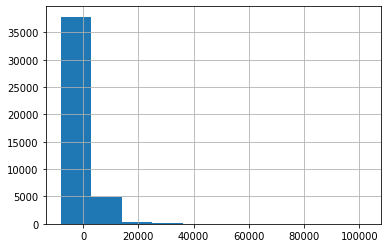

In [34]:
bank_d.balance.hist()

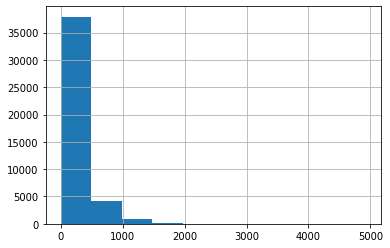

In [35]:
bank_d.duration.hist()

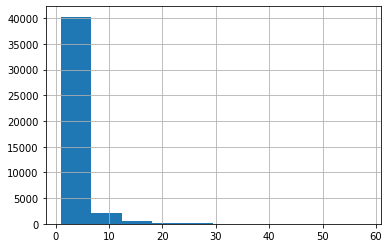

In [36]:
bank_d.contact_count.hist()

In [37]:
# There are outliers, 
# I do not want to remove too much, so by experimenting the quanitle function, I would choose to
# remove top 1% of the 3 columns. 
cutoff_balance = bank_d["balance"].quantile(0.99)
cutoff_duration = bank_d["duration"].quantile(0.99)
cutoff_cc = bank_d["contact_count"].quantile(0.99)

bank_d= bank_d[(bank_d.balance<cutoff_balance)&(bank_d.duration<cutoff_duration)&(bank_d["contact_count"]<cutoff_cc)]



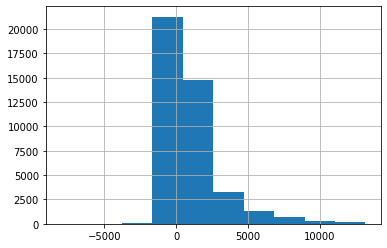

In [38]:
bank_d.balance.hist()

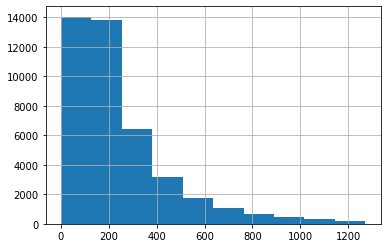

In [39]:
bank_d.duration.hist()

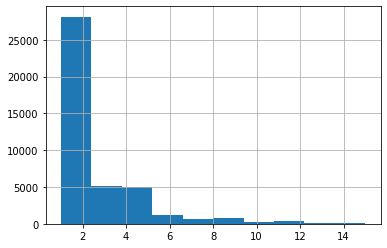

In [40]:
bank_d.contact_count.hist()

### 3. Build a logistic regression classification model with ’outcome’ column as the target, and using all other variables as predictors. Divide the data set into training (75 %) and test set (25 %), use random state = 0, and follow the process of building a classification model.

In [43]:
bank_d
# There are 41845 rows left. 

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,58,2143,1,0,5,5,261,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,5,151,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,5,76,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,35,231,1,0,5,5,139,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,447,1,1,5,5,217,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,0,0,17,11,977,3,0,1,...,0,0,0,0,1,0,1,0,0,1
43189,71,1729,0,0,17,11,456,2,0,1,...,1,0,0,0,0,0,0,0,0,0
43190,72,5715,0,0,17,11,1127,5,3,1,...,1,0,0,0,0,0,1,0,1,0
43191,57,668,0,0,17,11,508,4,0,0,...,0,0,0,0,0,0,1,0,1,0


In [44]:
x_train,x_test,y_train,y_test = train_test_split(bank_d.drop(["outcome"],axis=1),bank_d.outcome,test_size=0.25,random_state=0)

In [45]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000 )

In [46]:
model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 4. Create the confusion matrix, calculate classification performance measures. Identify the accuracy of the model on the test set.

In [47]:
y_predict= model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
matrix = ;
print (matrix)

# 439


[[9056  188]
 [ 967  251]]


In [49]:
# the accuracy is (9056+251)/(188+251+9056+967)
(9056+251)/(188+251+9056+967)

0.8896004588032881

In [50]:
# double check the accuracy

report = classification_report(y_test, y_predict)

print(report)

# The accuracy is 89%. 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9244
           1       0.57      0.21      0.30      1218

    accuracy                           0.89     10462
   macro avg       0.74      0.59      0.62     10462
weighted avg       0.86      0.89      0.87     10462



### 5. Findings. 


###  For example, Does the model perform similarly for the two possible categories of ’outcome’, i.e. for positive and negative class? Is it a problem? How many false negatives do you find, i.e. clients who would invest in the advertised product but the model predicts that they would not?

### 
### The model perform not similarly for the two possible categories of "outcome". 
### For the actual positive cases, the model has a low chance to predict correctly. 251/(967+251) = 21% (recall)
### There are (967+251 =) 1218 people who will actually invest, but the model only predict 251 people will invest. 
### The accuracy is 21%.
###
### For the actual negative cases, the mosel has a high chance to predict correctly. 9056/(9056+188)=98%(recall)
### There are (9056+188 =) 9244 people will not invest, the model predict 9056 people will not invest. 
### the accuracy is 98%.

### And Yes, I think it is a problem. 
### We will miss 79% interested customers. (recall is 21%).  
### This can lead to insufficient preparation of the bank，Seriously affect the bank's earnings.
### This means, there are there are 967 people(False Negtive) who would invest in the advertised product but the model predicts that they would not.